In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/original-dataset/podcast_dataset.csv
/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
from zipfile import ZipFile
zipObj = ZipFile('podcast_eda_viz.zip', 'w')

for filename in os.listdir("/kaggle/working"):
    if filename.endswith(".png"):
        zipObj.write(filename)
zipObj.close()

In [6]:
train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv', index_col='id')
original = pd.read_csv('/kaggle/input/original-dataset/podcast_dataset.csv')

# EDA

In [7]:
# Initial setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.float_format = '{:.2f}'.format

# Rename target in original data to match training data
original.rename(columns={'Listening_Time': 'Listening_Time_minutes'}, inplace=True)

In [8]:
# Basic dataset exploration
print("=== Dataset Shapes ===")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Original data shape: {original.shape}\n")

=== Dataset Shapes ===
Train shape: (750000, 11)
Test shape: (250000, 10)
Original data shape: (52500, 11)



In [9]:
print("=== Training Data Columns ===")
print(train.columns.tolist())
print("\n=== Original Data Columns ===")
print(original.columns.tolist())

=== Training Data Columns ===
['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes']

=== Original Data Columns ===
['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes']


In [10]:
# Check basic statistics
print("\n=== Training Data Summary ===")
print(train.describe(include='all'))


=== Training Data Summary ===
       Podcast_Name Episode_Title  Episode_Length_minutes   Genre  \
count        750000        750000               662907.00  750000   
unique           48           100                     NaN      10   
top      Tech Talks    Episode 71                     NaN  Sports   
freq          22847         10515                     NaN   87606   
mean            NaN           NaN                   64.50     NaN   
std             NaN           NaN                   32.97     NaN   
min             NaN           NaN                    0.00     NaN   
25%             NaN           NaN                   35.73     NaN   
50%             NaN           NaN                   63.84     NaN   
75%             NaN           NaN                   94.07     NaN   
max             NaN           NaN                  325.24     NaN   

        Host_Popularity_percentage Publication_Day Publication_Time  \
count                    750000.00          750000           750000  

In [11]:
print("\n=== Original Data Summary ===")
print(original.describe(include='all'))


=== Original Data Summary ===
       Podcast_Name Episode_Title  Episode_Length_minutes     Genre  \
count         52500         52500                47254.00     52500   
unique           48           100                     NaN        10   
top     Style Guide    Episode 61                     NaN  Business   
freq           1167           574                     NaN      5559   
mean            NaN           NaN                   62.85       NaN   
std             NaN           NaN                   33.14       NaN   
min             NaN           NaN                    5.00       NaN   
25%             NaN           NaN                   34.30       NaN   
50%             NaN           NaN                   62.87       NaN   
75%             NaN           NaN                   91.55       NaN   
max             NaN           NaN                  120.00       NaN   

        Host_Popularity_percentage Publication_Day Publication_Time  \
count                     52500.00           

In [12]:
# Check missing values
print("\n=== Missing Values ===")
print("Training Data:")
print(train.isna().sum())
print("\nOriginal Data:")
print(original.isna().sum())


=== Missing Values ===
Training Data:
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

Original Data:
Podcast_Name                      0
Episode_Title                     0
Episode_Length_minutes         5246
Genre                             0
Host_Popularity_percentage        0
Publication_Day                   0
Publication_Time                  0
Guest_Popularity_percentage    5258
Number_of_Ads                     0
Episode_Sentiment                 0
Listening_Time_minutes         5395
dtype: int64


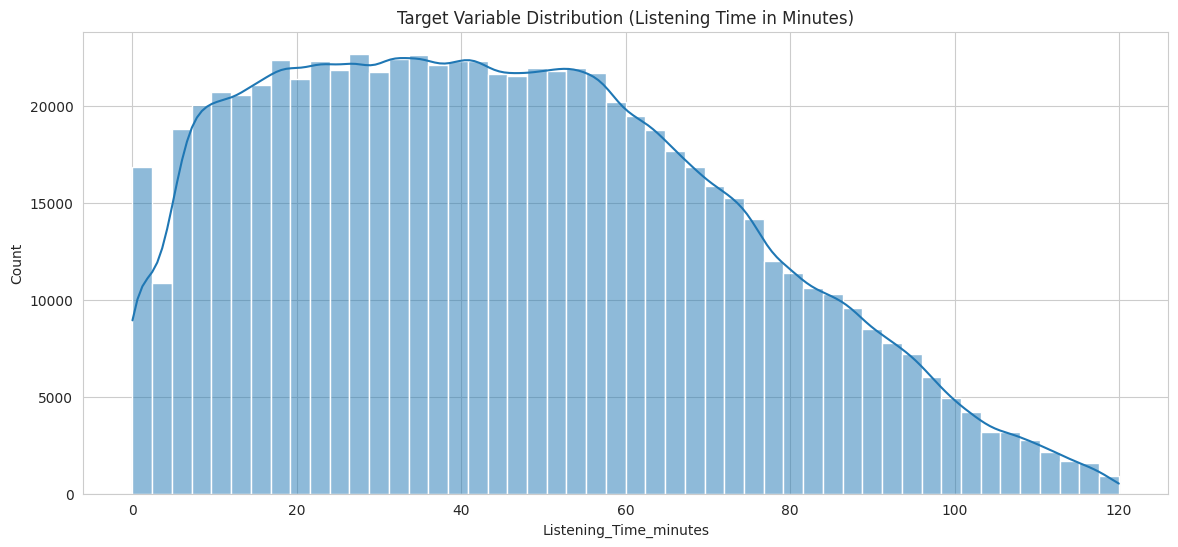

In [13]:
# Target variable analysis
plt.figure(figsize=(14, 6))
sns.histplot(train['Listening_Time_minutes'], kde=True, bins=50)
plt.title('Target Variable Distribution (Listening Time in Minutes)')
plt.show()

In [14]:
# Numerical features analysis
numerical = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
categorical = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 
               'Publication_Time', 'Episode_Sentiment']


=== Numerical Features Analysis ===


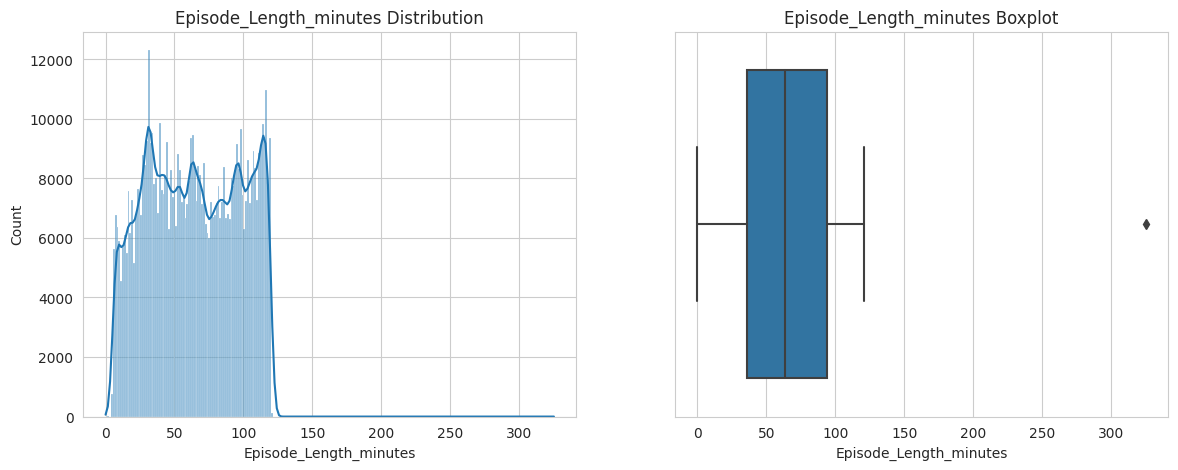

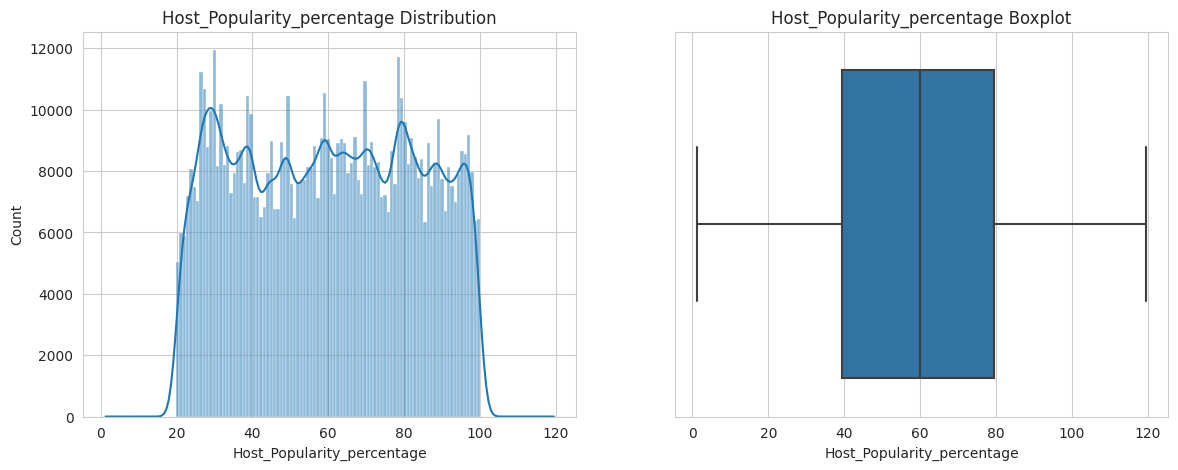

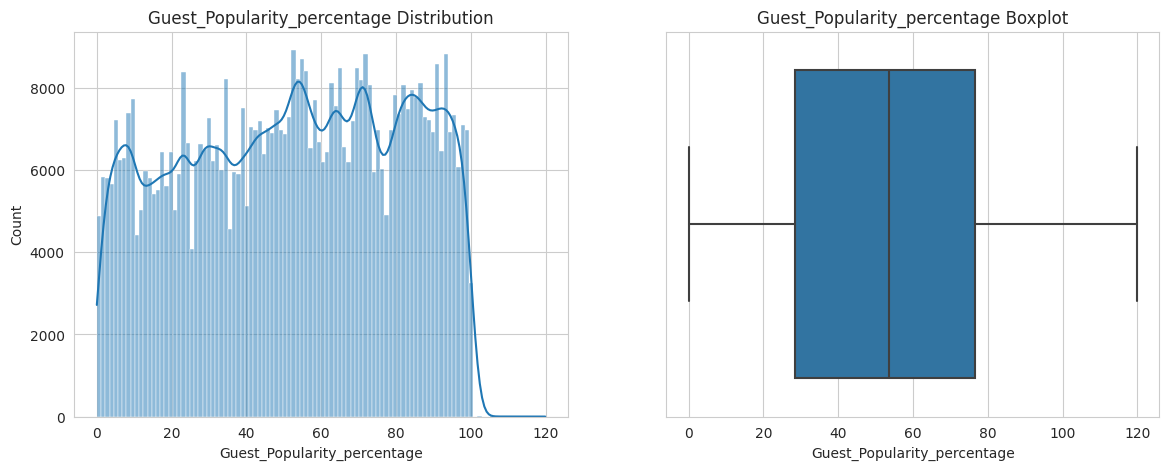

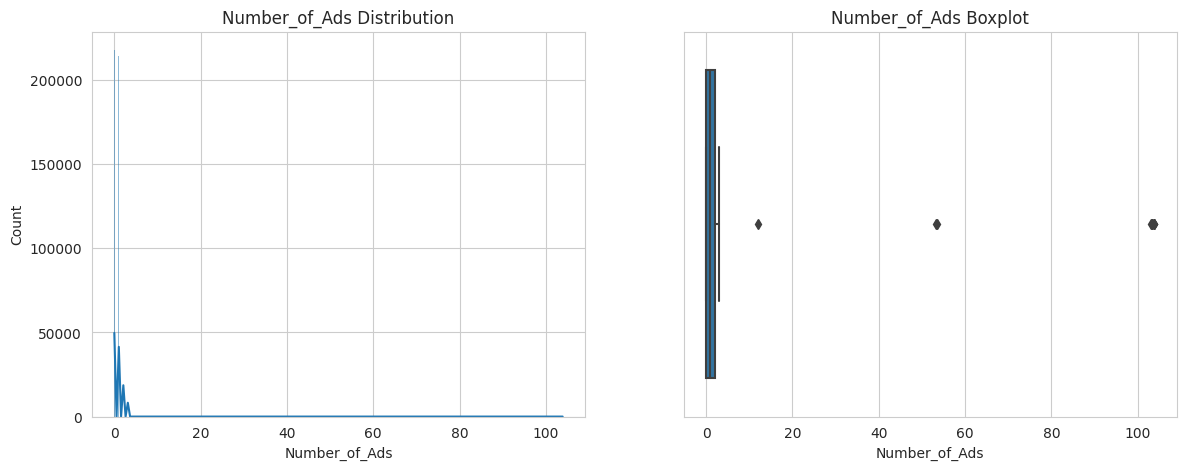

In [15]:
# Numerical features distributions
print("\n=== Numerical Features Analysis ===")
for col in numerical:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(train[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    sns.boxplot(x=train[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    plt.show()


=== Categorical Features Analysis ===

Podcast_Name has 48 unique values 
Unique values: ['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']


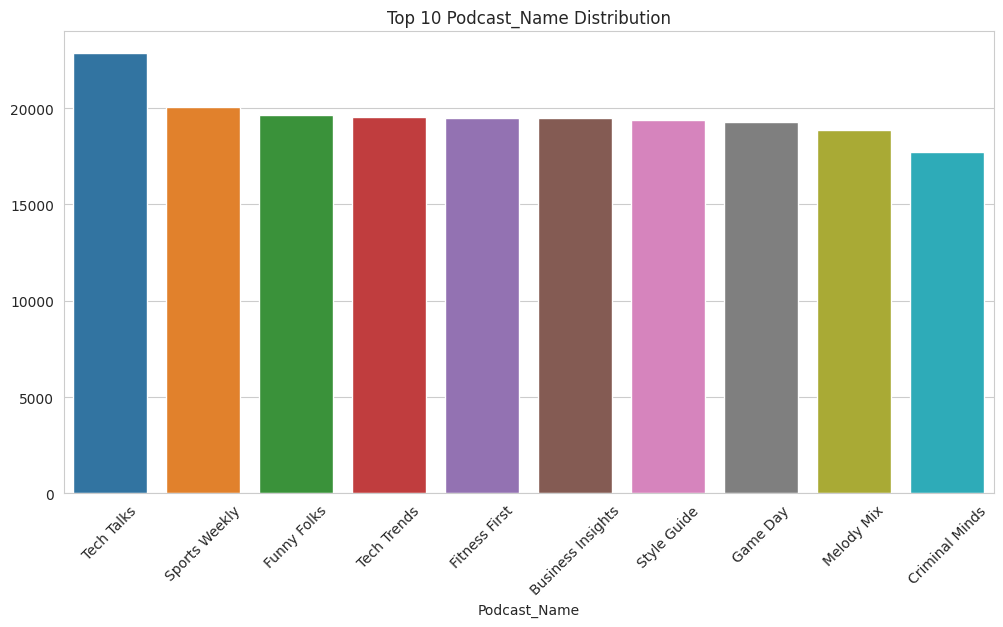


Genre has 10 unique values 
Unique values: ['True Crime' 'Comedy' 'Education' 'Technology' 'Health' 'News' 'Music'
 'Sports' 'Business' 'Lifestyle']


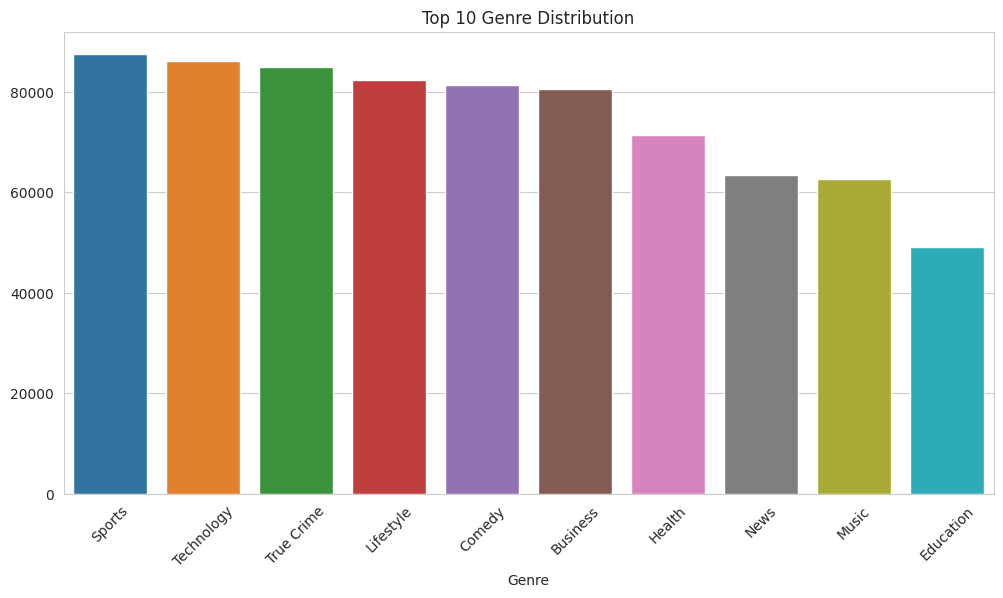


Publication_Day has 7 unique values 
Unique values: ['Thursday' 'Saturday' 'Tuesday' 'Monday' 'Sunday' 'Wednesday' 'Friday']


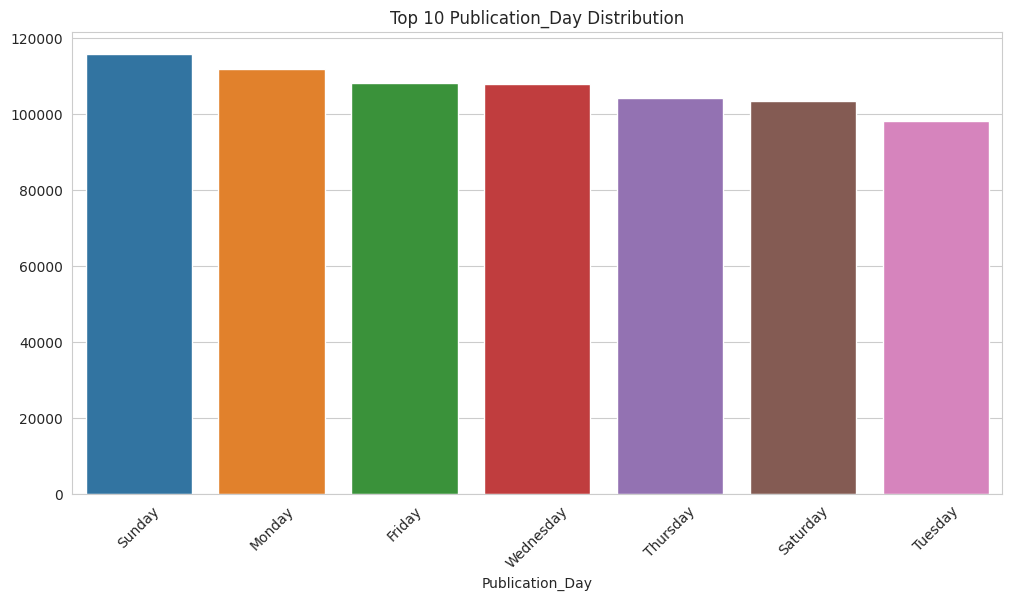


Publication_Time has 4 unique values 
Unique values: ['Night' 'Afternoon' 'Evening' 'Morning']


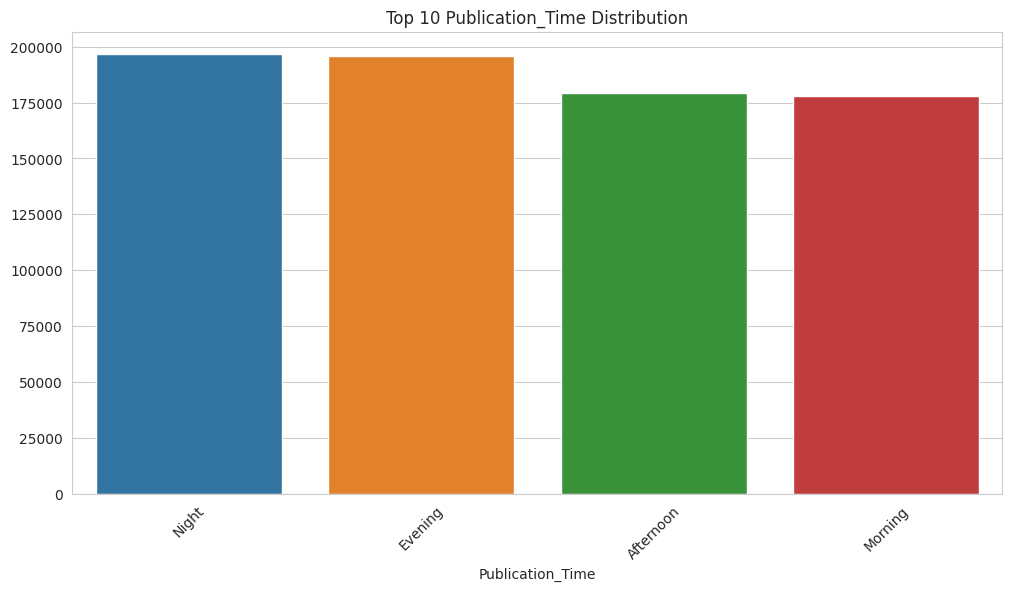


Episode_Sentiment has 3 unique values 
Unique values: ['Positive' 'Negative' 'Neutral']


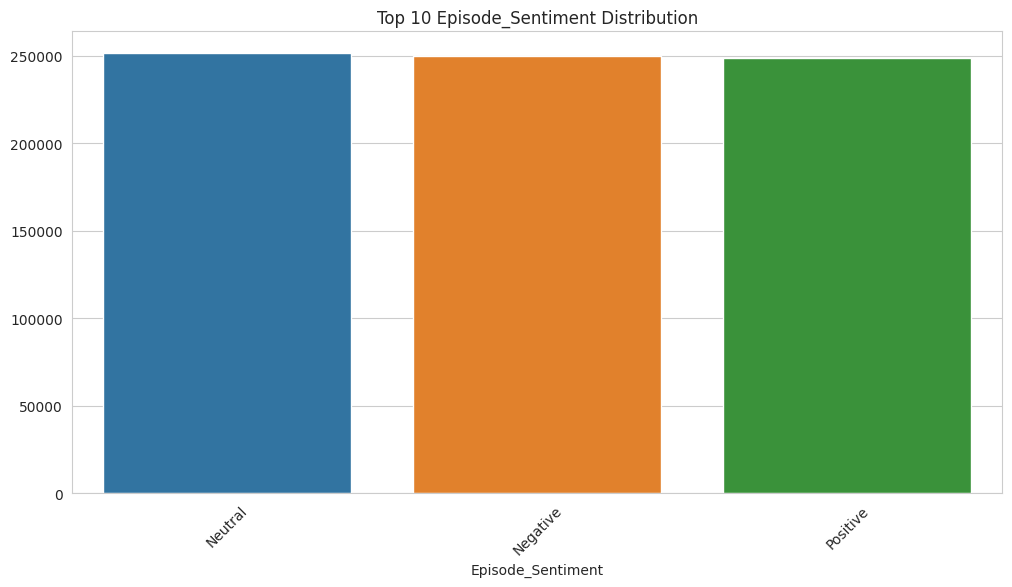

In [16]:
# Categorical features analysis
print("\n=== Categorical Features Analysis ===")
for col in categorical:
    if col == "Episode_Title":
        continue
    print(f"\n{col} has {train[col].nunique()} unique values ")
    print(f"Unique values: {train[col].unique()}")
    top_cats = train[col].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_cats.index, y=top_cats.values)
    plt.title(f'Top 10 {col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

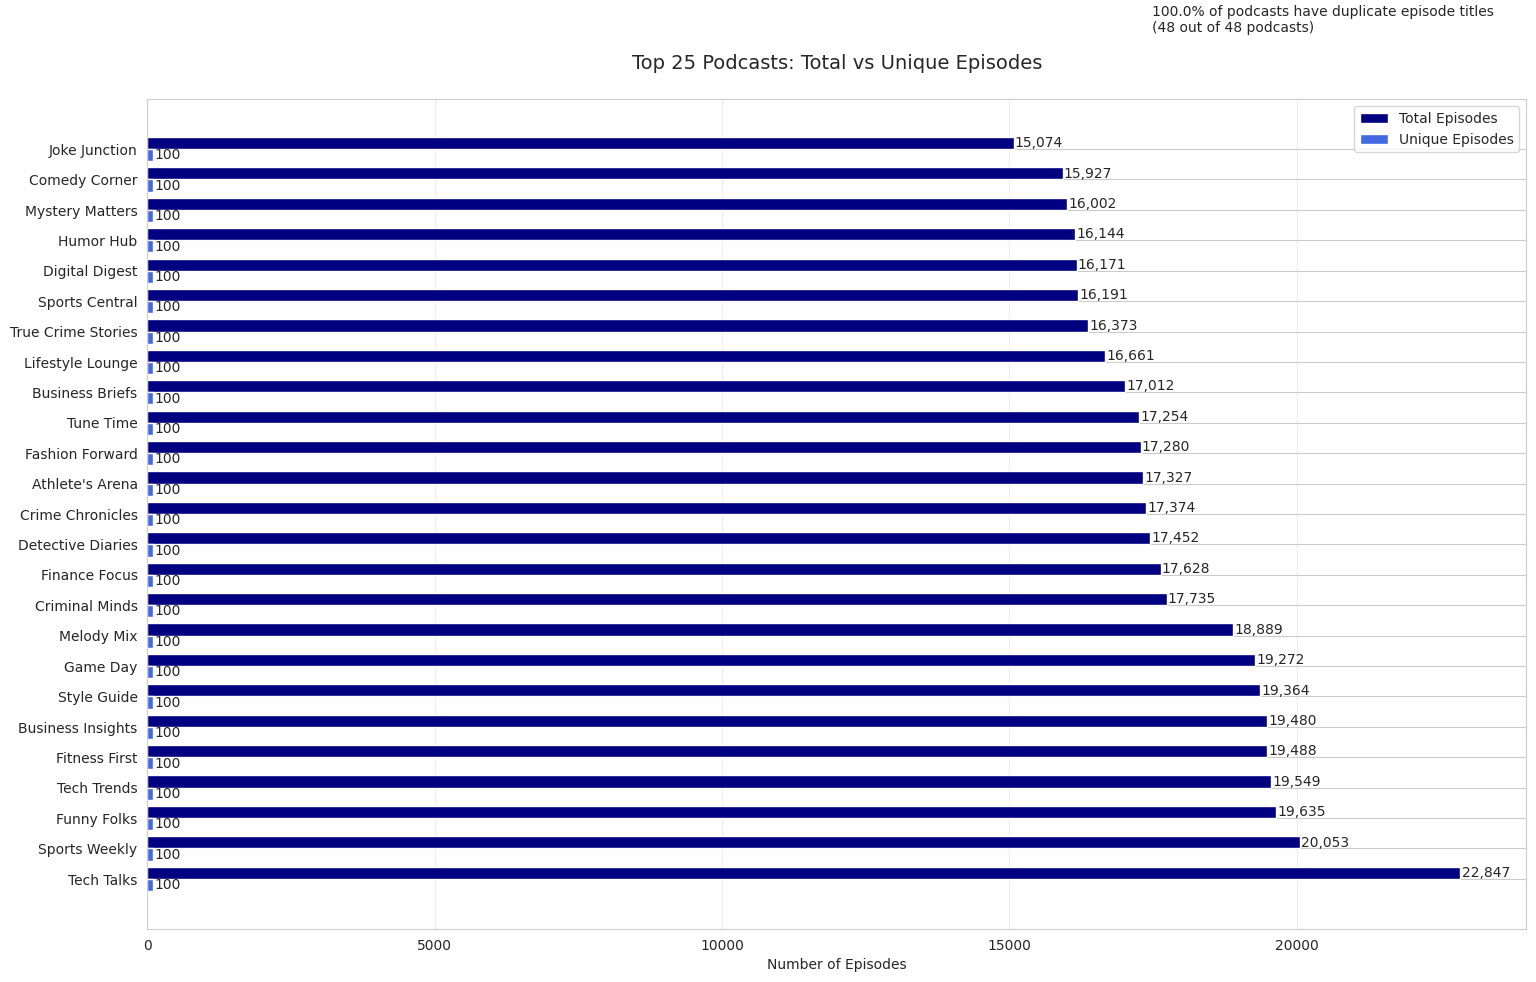


=== Duplicate Episode Statistics ===
Podcasts with perfect unique episodes: 0
Average duplication ratio: 0.9934
Maximum duplicates in a podcast: 22,747


In [17]:
# Calculate episode counts and unique episodes
podcast_stats = train.groupby('Podcast_Name').agg(
    total_episodes=('Episode_Title', 'count'),
    unique_episodes=('Episode_Title', 'nunique')
).reset_index()

# Sort by total episodes
podcast_stats = podcast_stats.sort_values('total_episodes', ascending=False)

# Create comparison plot for top podcasts
top_n = 25
plt.figure(figsize=(16, 10))

# Get top podcasts
top_podcasts = podcast_stats.head(top_n).sort_values('total_episodes', ascending=True)

# Create horizontal positions
y = np.arange(len(top_podcasts))

# Plot bars
bar1 = plt.barh(y - 0.2, top_podcasts['total_episodes'], 0.4, label='Total Episodes', color='navy')
bar2 = plt.barh(y + 0.2, top_podcasts['unique_episodes'], 0.4, label='Unique Episodes', color='royalblue')

# Add labels and title
plt.yticks(y, top_podcasts['Podcast_Name'])
plt.xlabel('Number of Episodes')
plt.title(f'Top {top_n} Podcasts: Total vs Unique Episodes\n', fontsize=14)
plt.legend()

# Add value labels
for bars in [bar1, bar2]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 20, bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', ha='left', va='center')

plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', alpha=0.3)

# Add duplicate statistics
duplicates = podcast_stats[podcast_stats['total_episodes'] > podcast_stats['unique_episodes']]
dup_percentage = len(duplicates)/len(podcast_stats)*100

plt.annotate(f'{dup_percentage:.1f}% of podcasts have duplicate episode titles\n'
            f'({len(duplicates):,} out of {len(podcast_stats):,} podcasts)',
            xy=(0.72, 0.95), xycoords='figure fraction',
            bbox=dict(boxstyle='round', fc='white'))

plt.tight_layout()
plt.show()

# Statistical summary
print("\n=== Duplicate Episode Statistics ===")
print(f"Podcasts with perfect unique episodes: {len(podcast_stats[podcast_stats['total_episodes'] == podcast_stats['unique_episodes']]):,}")
print(f"Average duplication ratio: {(1 - (podcast_stats['unique_episodes']/podcast_stats['total_episodes'])).mean():.4f}")
print(f"Maximum duplicates in a podcast: {(podcast_stats['total_episodes'] - podcast_stats['unique_episodes']).max():,}")


=== Relationship with Target Variable ===


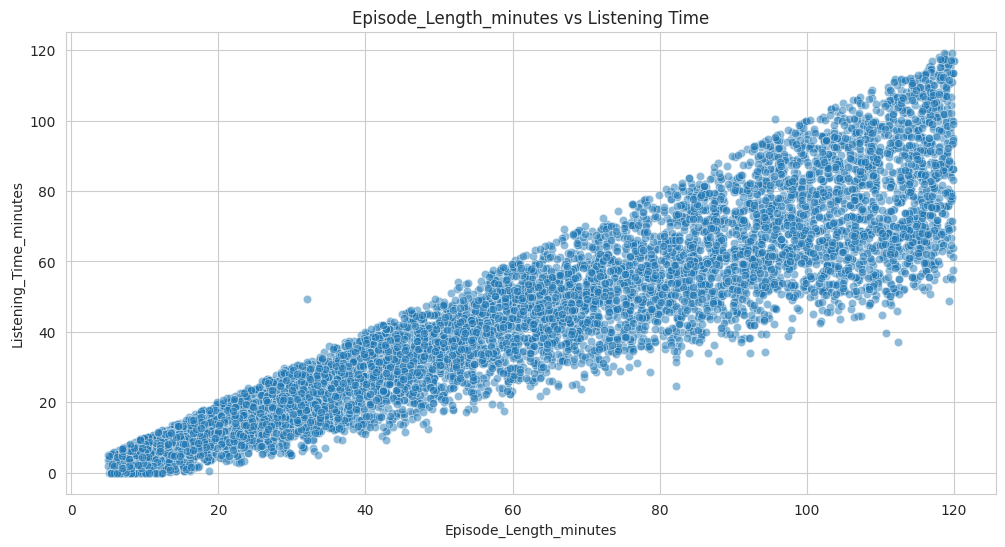

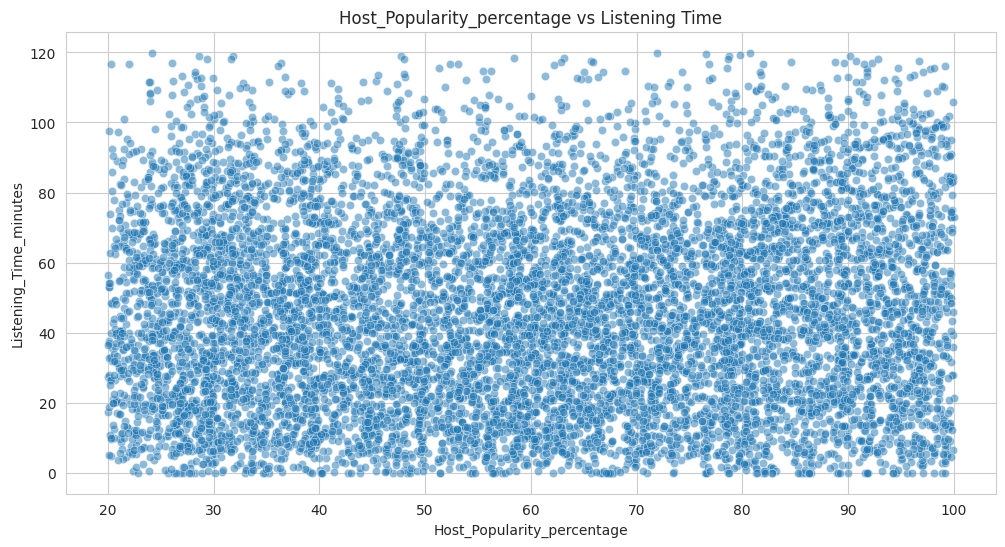

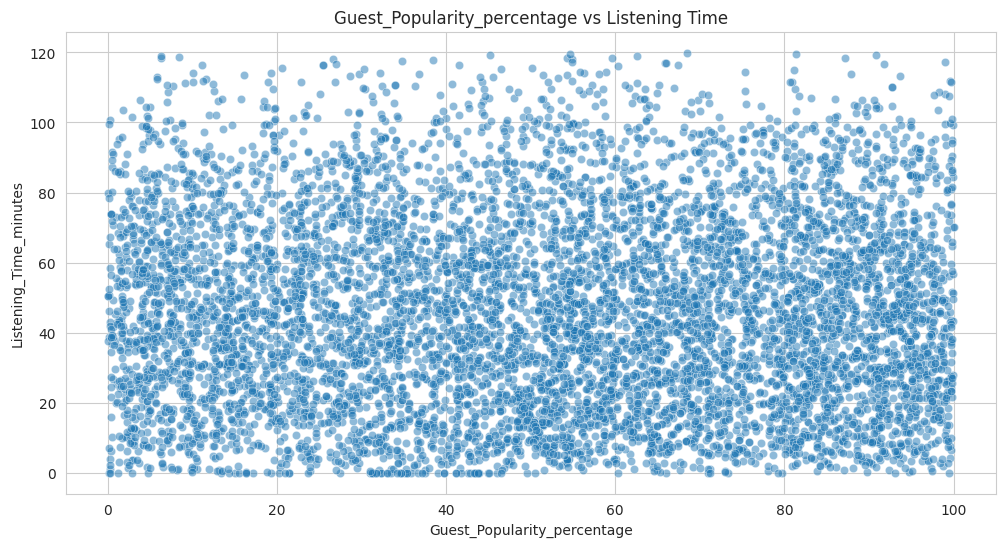

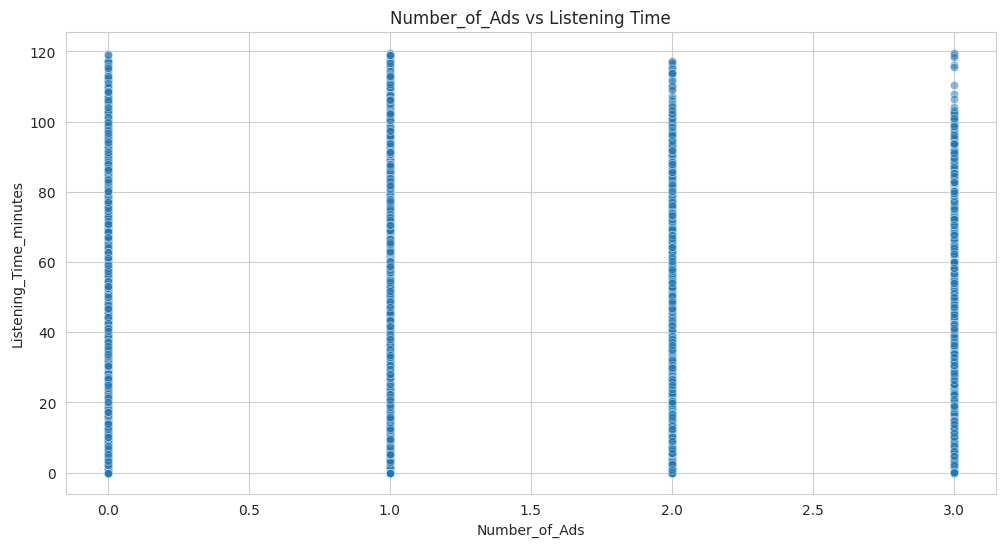

In [18]:
# Relationship with target variable
print("\n=== Relationship with Target Variable ===")

# Numerical features vs target
for col in numerical:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=train.sample(10000), x=col, y='Listening_Time_minutes', alpha=0.5)
    plt.title(f'{col} vs Listening Time')
    plt.show()


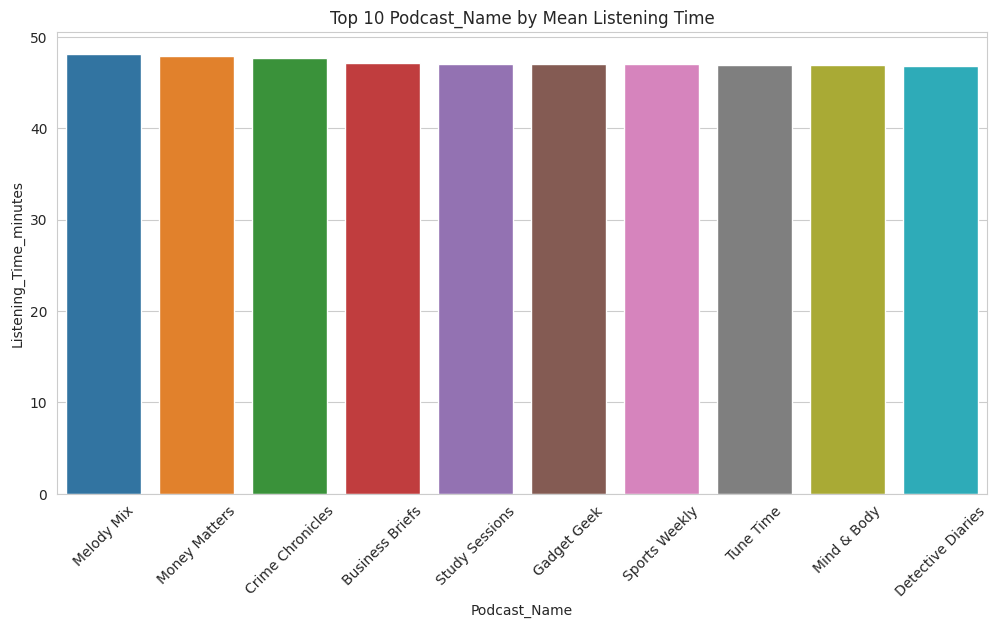

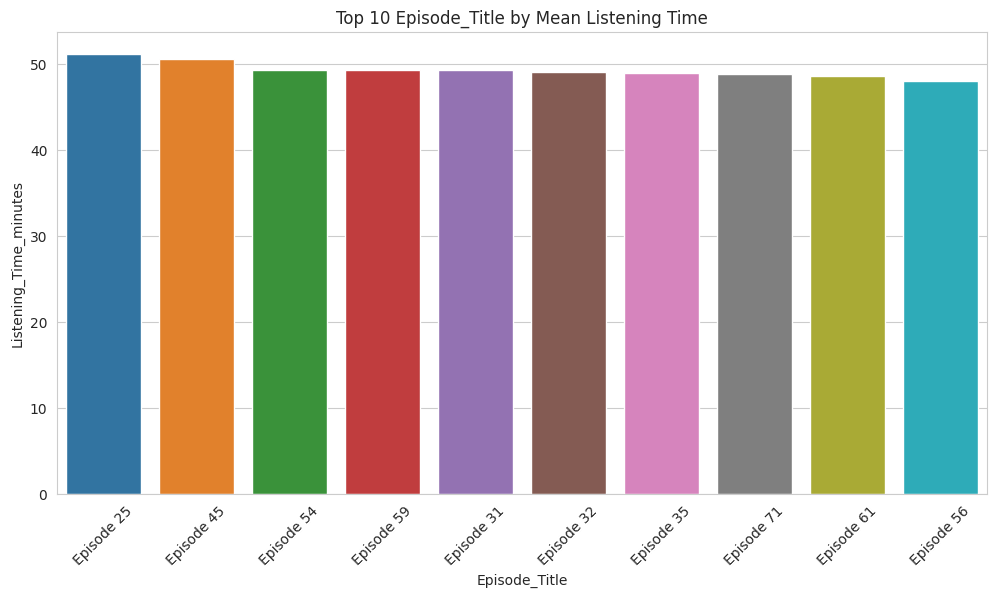

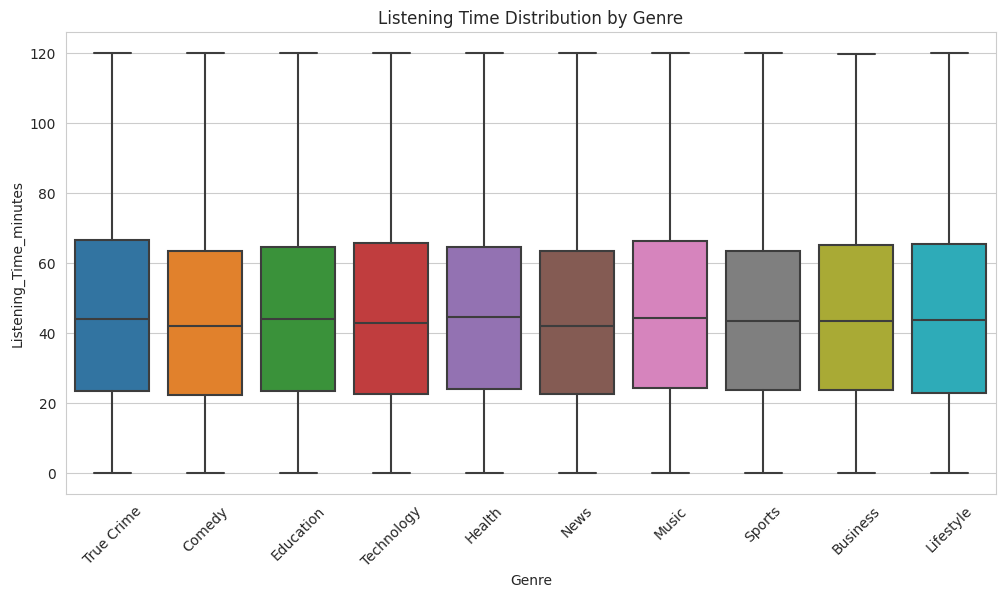

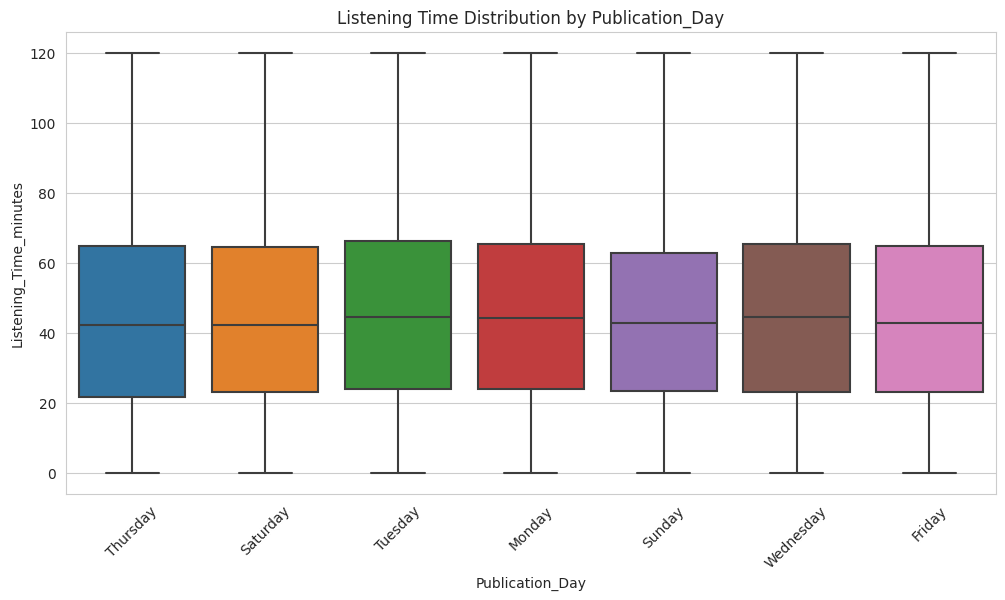

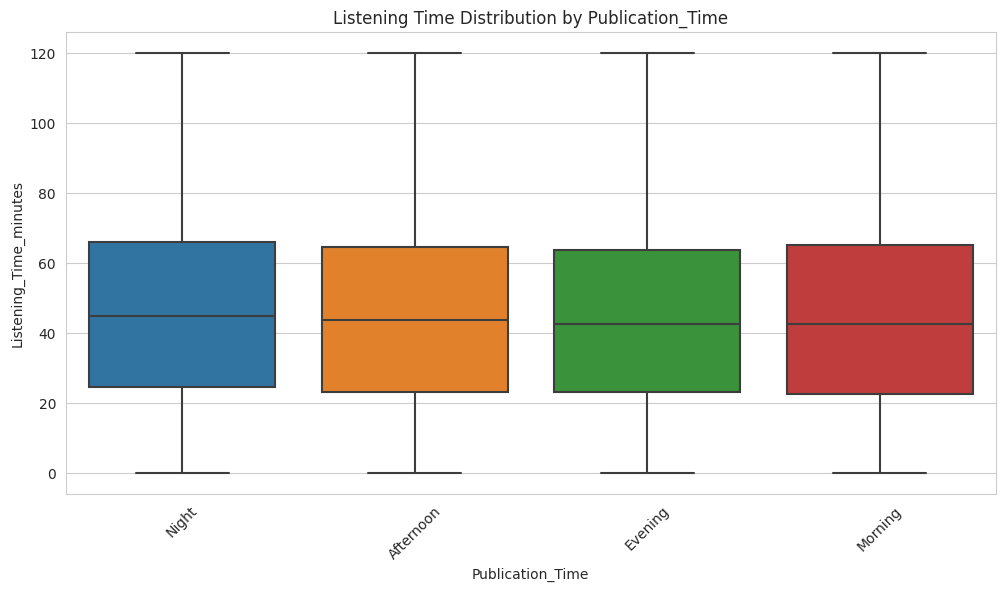

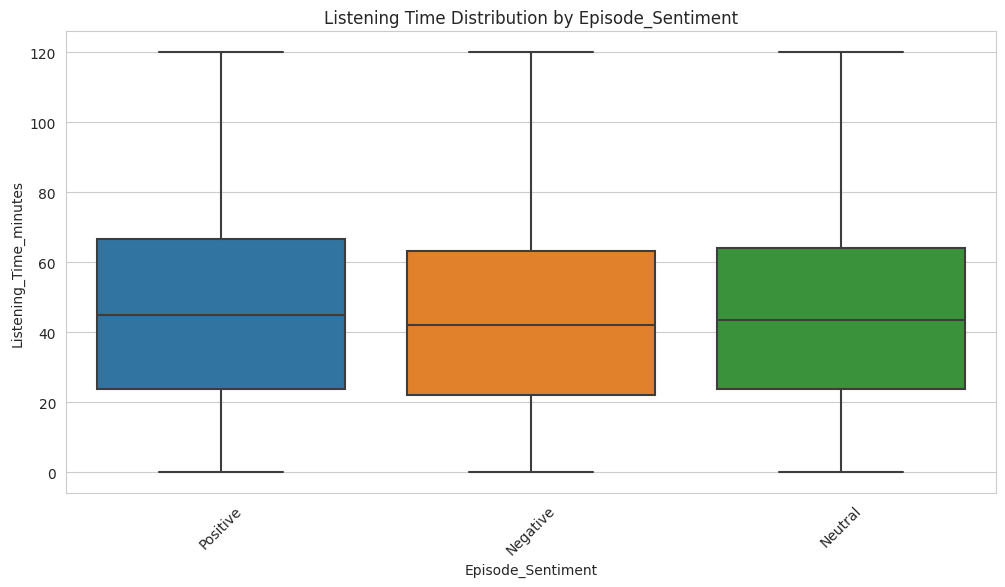

In [19]:
# Categorical features vs target
for col in categorical:
    if train[col].nunique() > 20:
        temp_df = train.groupby(col)['Listening_Time_minutes'].mean().nlargest(10).reset_index()
        plt.figure(figsize=(12, 6))
        sns.barplot(data=temp_df, x=col, y='Listening_Time_minutes')
        plt.title(f'Top 10 {col} by Mean Listening Time')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=train, x=col, y='Listening_Time_minutes')
        plt.title(f'Listening Time Distribution by {col}')
        plt.xticks(rotation=45)
        plt.show()

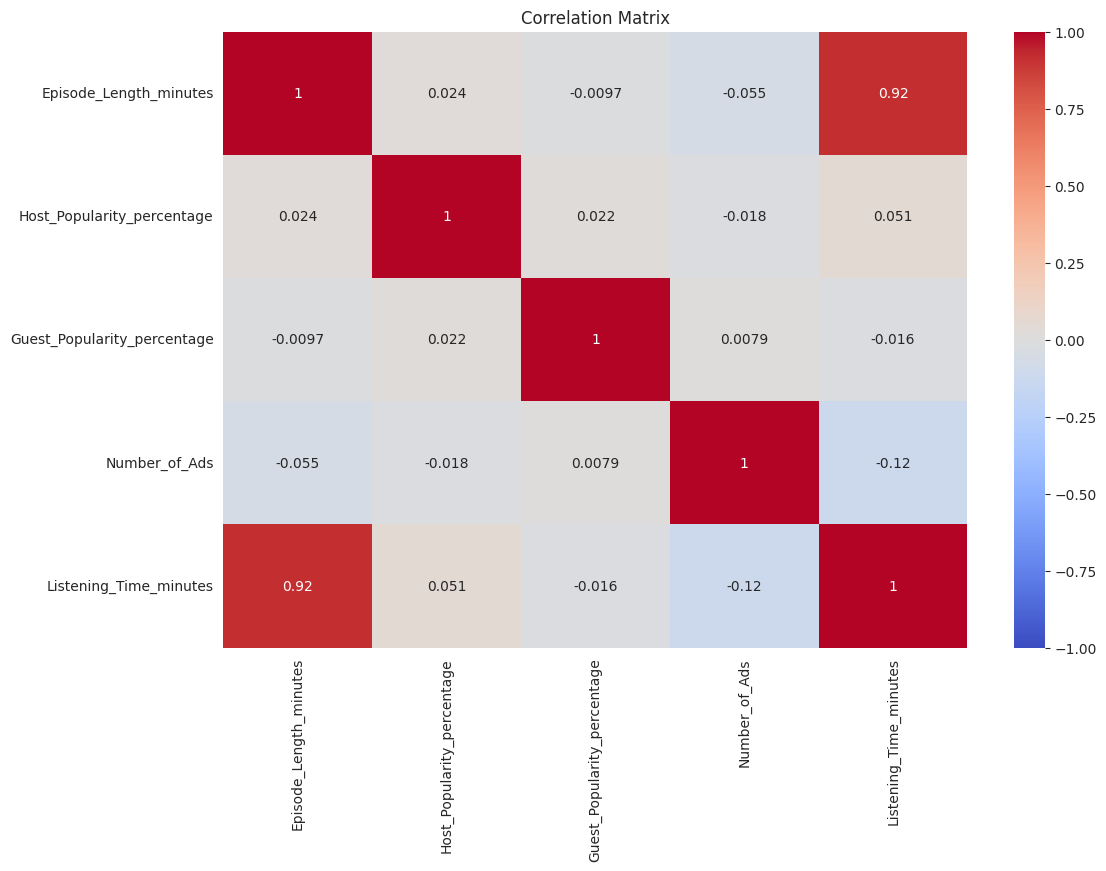

In [20]:
# Correlation analysis
corr_matrix = train[numerical + ['Listening_Time_minutes']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

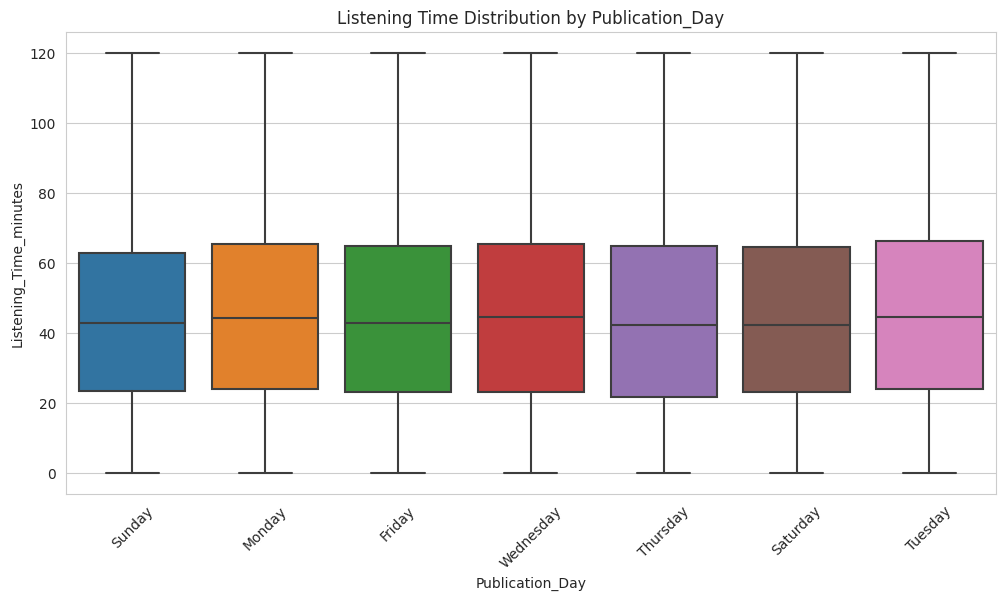

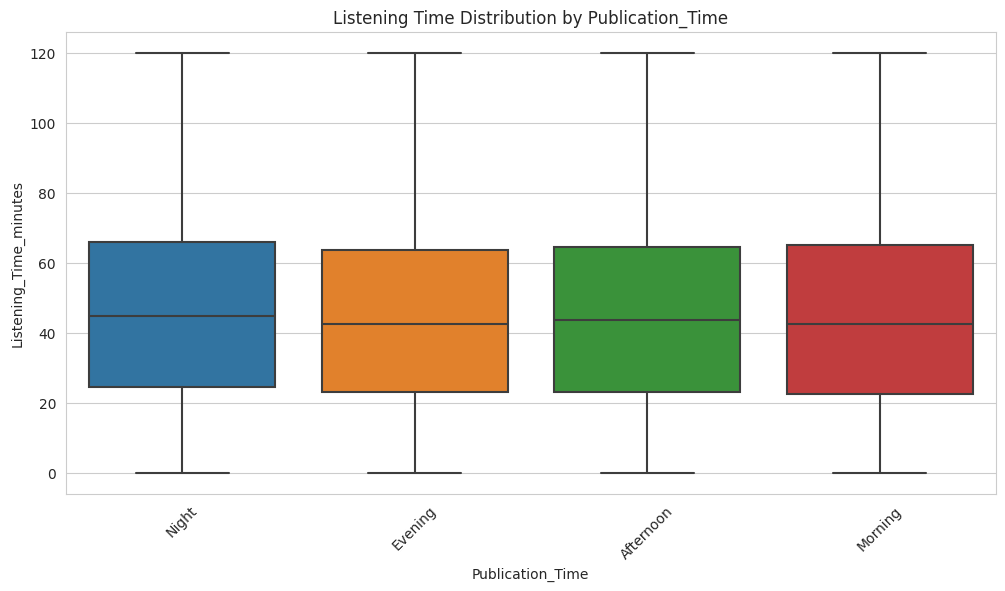

In [21]:
# Temporal analysis
time_features = ['Publication_Day', 'Publication_Time']
for feat in time_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train, x=feat, y='Listening_Time_minutes', 
                order=train[feat].value_counts().index)
    plt.title(f'Listening Time Distribution by {feat}')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>

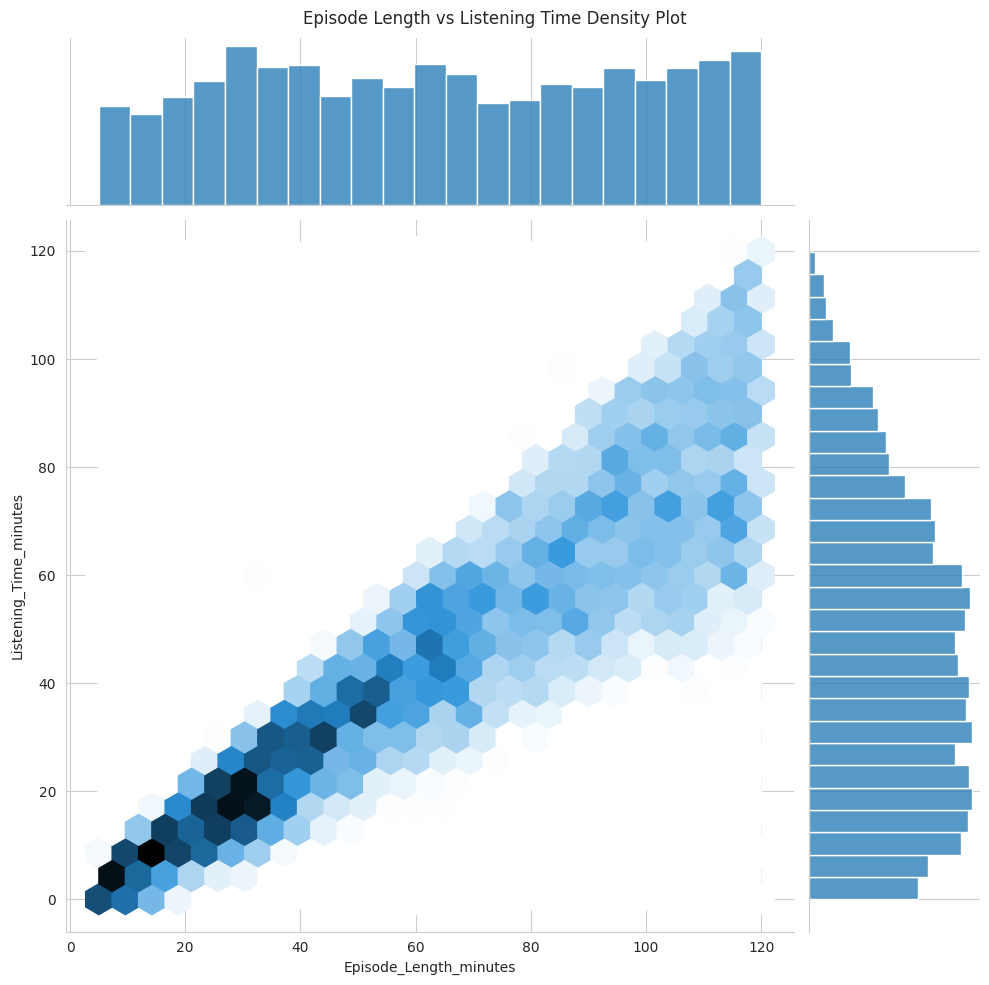

In [22]:
# Episode length vs listening time analysis
plt.figure(figsize=(12, 6))
sns.jointplot(data=train.sample(10000), x='Episode_Length_minutes', y='Listening_Time_minutes', 
             kind='hex', height=10, ratio=4)
plt.suptitle('Episode Length vs Listening Time Density Plot')
plt.tight_layout()
plt.show()

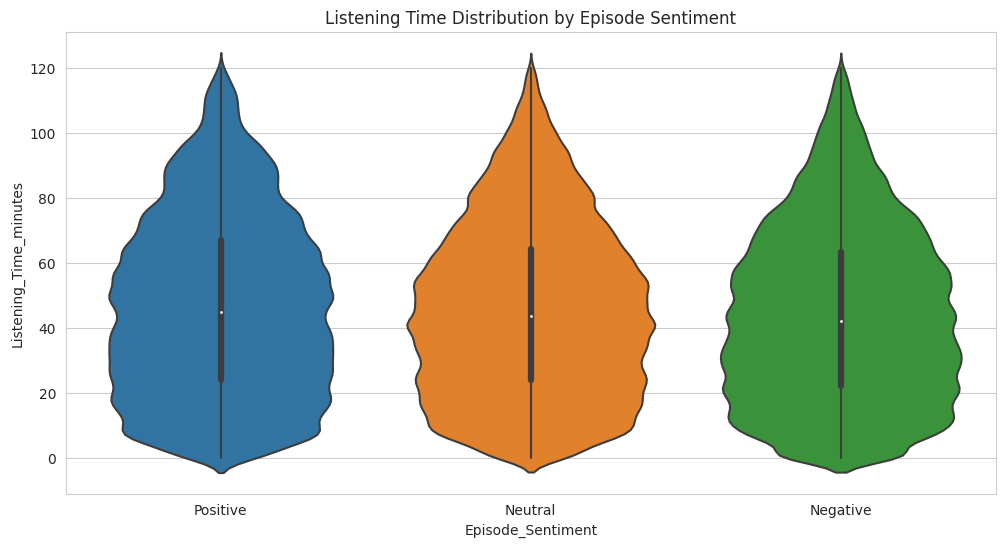

In [23]:
# Sentiment analysis
sentiment_order = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(12, 6))
sns.violinplot(data=train, x='Episode_Sentiment', y='Listening_Time_minutes', 
              order=sentiment_order)
plt.title('Listening Time Distribution by Episode Sentiment')
plt.show()

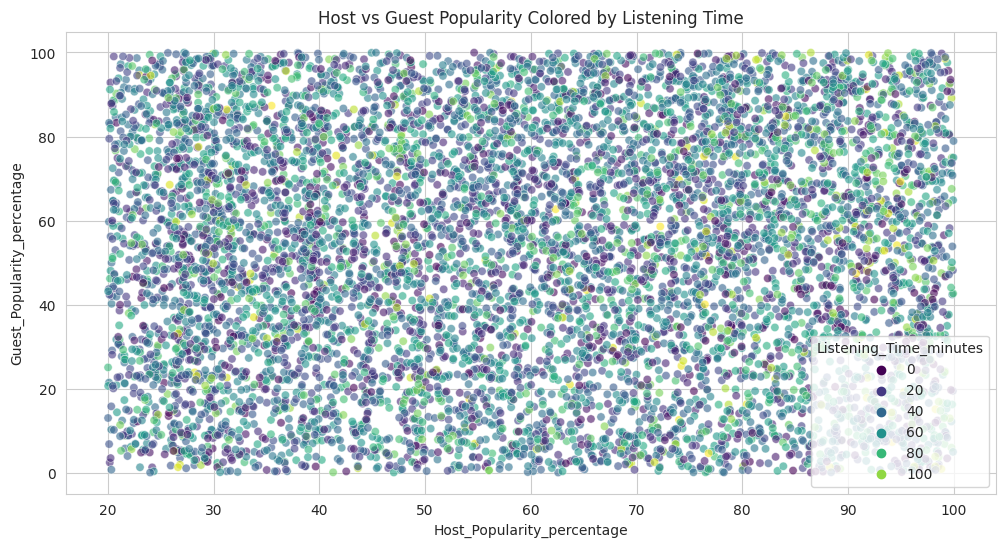

In [24]:
# Host vs Guest popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train.sample(10000), x='Host_Popularity_percentage', y='Guest_Popularity_percentage', 
                hue='Listening_Time_minutes', palette='viridis', alpha=0.6)
plt.title('Host vs Guest Popularity Colored by Listening Time')
plt.show()

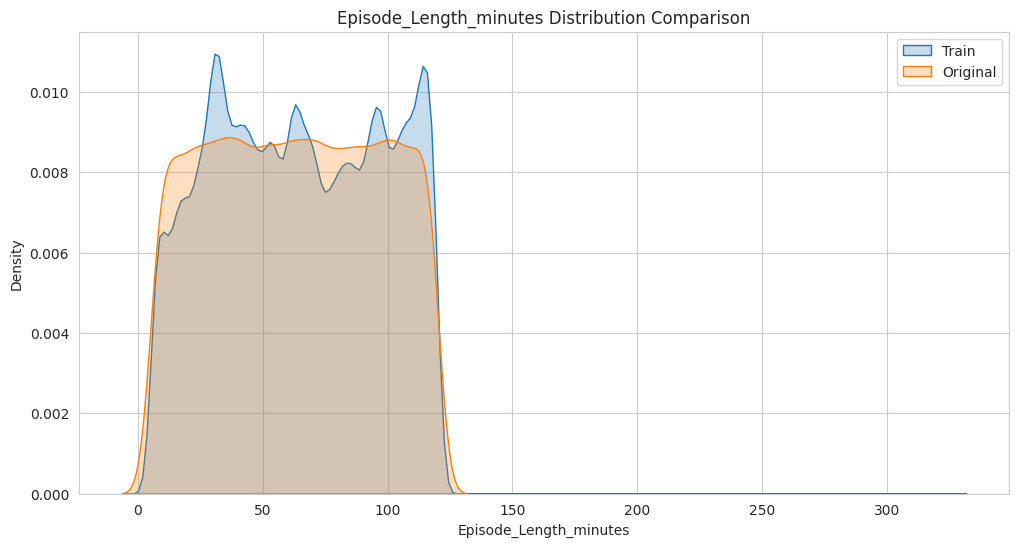

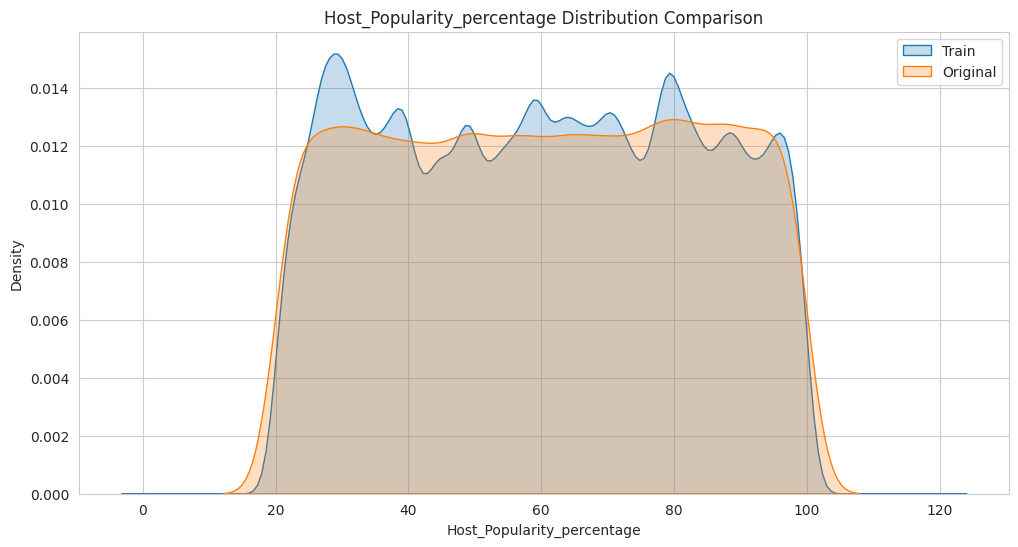

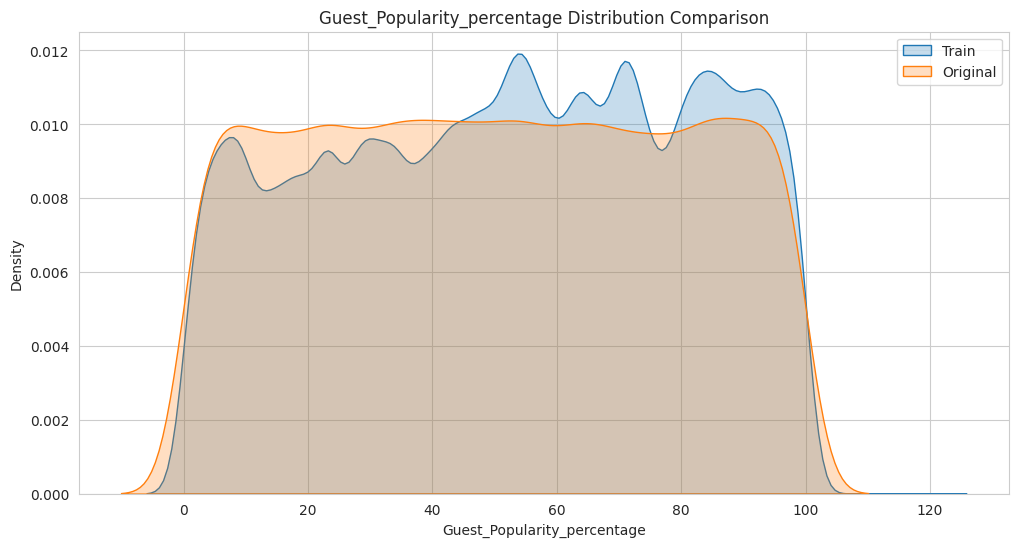

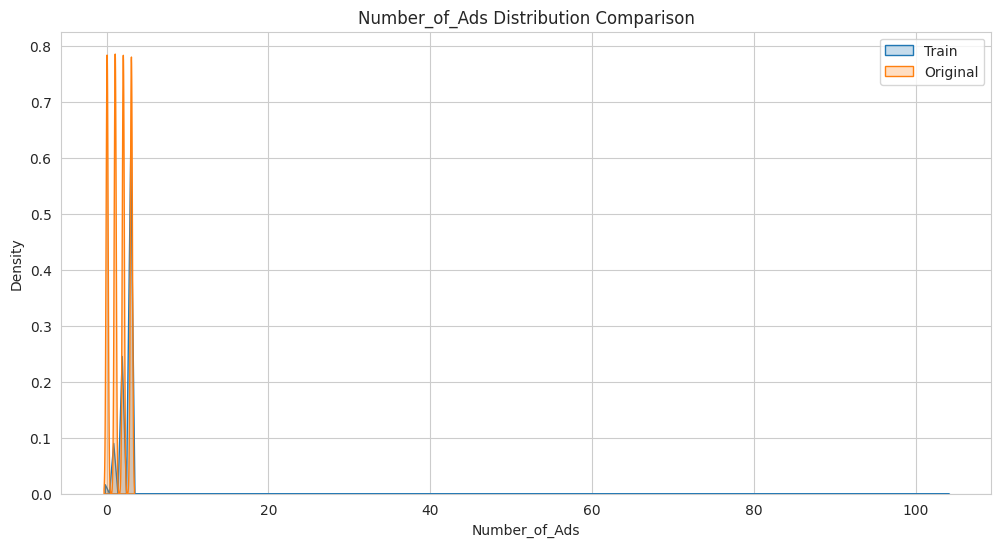

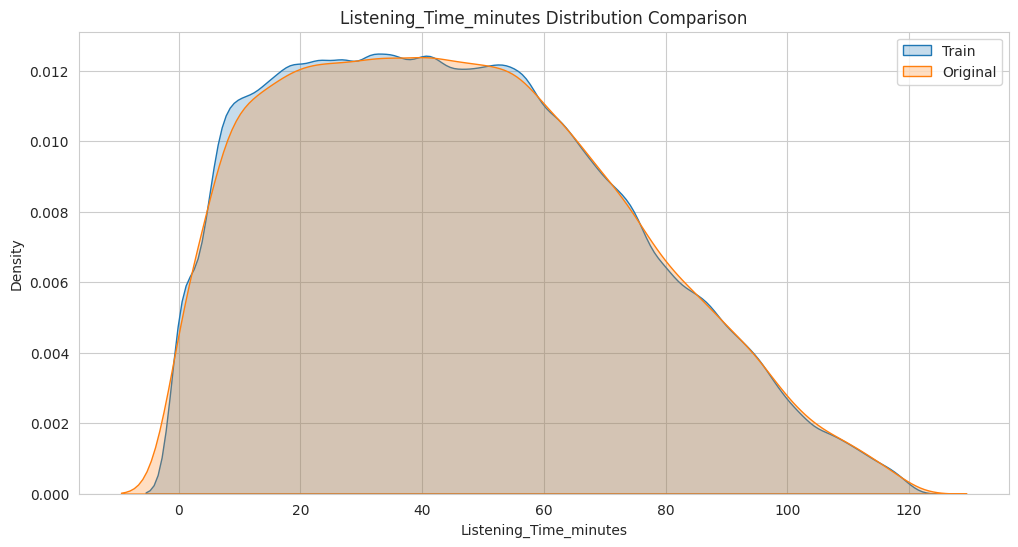

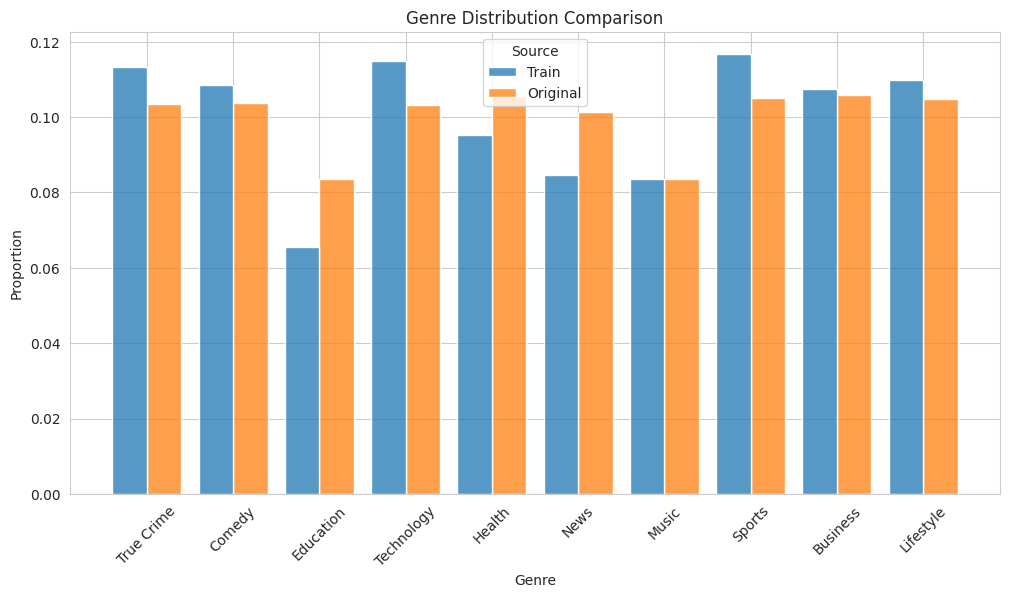

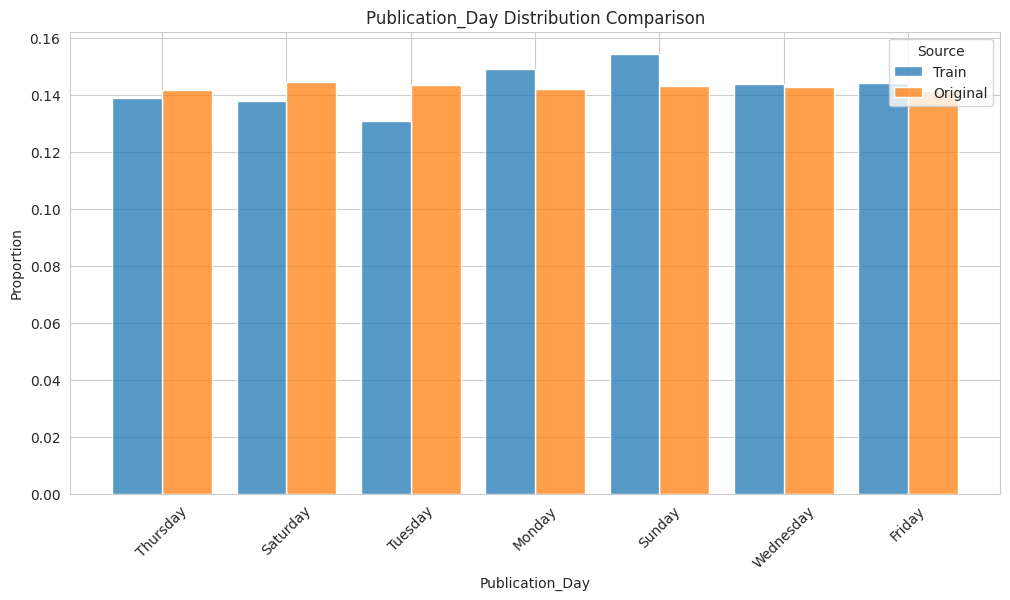

In [25]:
# Separate numerical and categorical features
num_compare = numerical + ['Listening_Time_minutes']
cat_compare = ['Genre', 'Publication_Day']

# Numerical feature comparison
for col in num_compare:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(train[col], label='Train', fill=True)
    sns.kdeplot(original[col], label='Original', fill=True)
    plt.title(f'{col} Distribution Comparison')
    plt.legend()
    plt.show()

# Categorical feature comparison
for col in cat_compare:
    # Create combined dataframe
    train_copy = train[col].to_frame().assign(Source='Train')
    original_copy = original[col].to_frame().assign(Source='Original')
    combined = pd.concat([train_copy, original_copy])
    
    # Create normalized countplot
    plt.figure(figsize=(12, 6))
    sns.histplot(data=combined, x=col, hue='Source', 
                 stat='proportion', common_norm=False, 
                 multiple='dodge', shrink=0.8,
                 palette=['#1f77b4', '#ff7f0e'])
    
    plt.title(f'{col} Distribution Comparison')
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# Check impossible values
print("\n=== Data Validity Checks ===")
print(f"Episodes with listening time > length: {len(train[train['Listening_Time_minutes'] > train['Episode_Length_minutes']])}")
print(f"Negative values in listening time: {len(train[train['Listening_Time_minutes'] < 0])}")


=== Data Validity Checks ===
Episodes with listening time > length: 2568
Negative values in listening time: 0


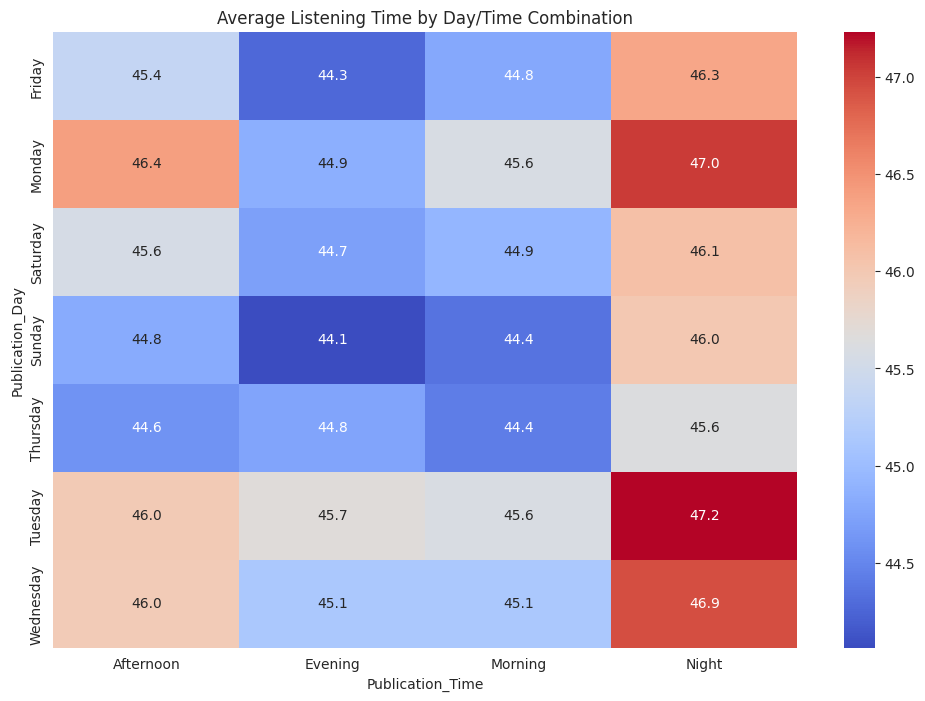

In [27]:
# Publication day/time combination analysis
day_time_combo = train.groupby(['Publication_Day', 'Publication_Time'])['Listening_Time_minutes'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(day_time_combo, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Average Listening Time by Day/Time Combination')
plt.show()

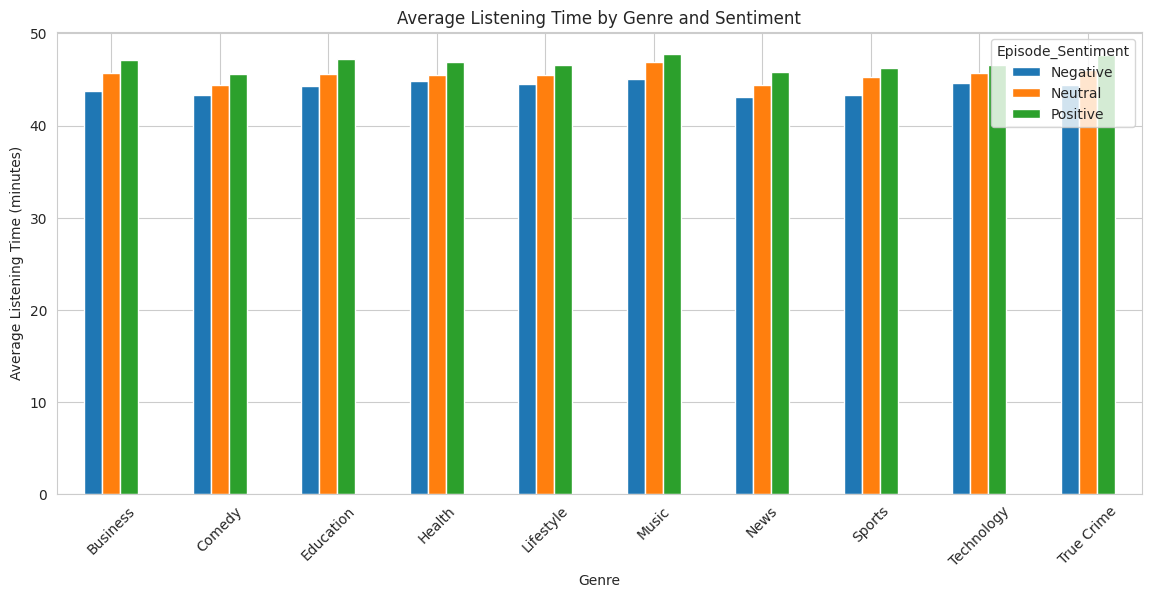

In [28]:
# Genre and sentiment combination
genre_sentiment = train.groupby(['Genre', 'Episode_Sentiment'])['Listening_Time_minutes'].mean().unstack()
genre_sentiment.plot(kind='bar', figsize=(14, 6))
plt.title('Average Listening Time by Genre and Sentiment')
plt.ylabel('Average Listening Time (minutes)')
plt.xticks(rotation=45)
plt.show()